<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/revisar_experimentos_metodo_tese2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache Cassandra Dataset

**Review Apache Cassandra Dataset generated by ATDCodeAnalyser experiment**

In [1]:
import pandas as pd

In [2]:
# Create the boxplot
def generate_boxsplot(coluna, my_title, xlabel, ylabel, outliers=True):
  plt.figure(figsize=(10, 6))
  plt.boxplot(coluna, showfliers=outliers)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(my_title)
  plt.grid(True)
  plt.show()

def clean_and_format_df(df_original):
  df = df_original.copy()
  # Handle missing values (if any) in the 'time_resolution' column
  df.dropna(subset=['time_resolution'], inplace=True)
  # Extract the numeric part (assuming format "X days")
  df['time_resolution_days'] = df['time_resolution'].str.extract('(\d+)').astype(int)

  return df

import re

def extract_cassandra_id(text):
  """
  This function extracts the pattern CASSANDRA- followed by any digits from a text string.

  Args:
      text: The text string to search.

  Returns:
      A string containing the extracted ID (e.g., "CASSANDRA-123") or None if not found.
  """
  my_match = re.search(r"CASSANDRA-(\d+)", text)
  if my_match:
    return my_match.group(0)  # Return the entire matched string
  else:
    return None

## Issues in commits with critical files

In [3]:
url_file2 = "https://github.com/armandossrecife/my_evaluation/raw/main/cassandra/cassandra_issues_in_commits_arquivos_criticos.xlsx"

In [4]:
df_cassandra_issues_in_commits_arquivos_criticos = pd.read_excel(url_file2)
df_cassandra_issues_in_commits_arquivos_criticos

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,CASSANDRA-261,Bug,Resolved,get_slice needs offset + limit,2009-06-26,2009-07-06,10 days
1,CASSANDRA-259,New Feature,Resolved,LRU cache for key positions,2009-06-26,2009-07-06,10 days
2,CASSANDRA-254,Improvement,Resolved,clean up sstable constructors,2009-06-24,2009-06-25,1 days
3,CASSANDRA-251,Improvement,Resolved,Restore ColumnSort=Time on Super Columnfamilies,2009-06-24,2009-07-06,12 days
4,CASSANDRA-248,Improvement,Resolved,Replace factory method based on explicit locks...,2009-06-21,2009-11-20,152 days
...,...,...,...,...,...,...,...
2907,CASSANDRA-18504,Improvement,Resolved,"Added support for type VECTOR<type, dimension>",2023-05-05,2023-06-22,48 days
2908,CASSANDRA-18500,New Feature,Resolved,Add guardrail for partition size,2023-05-04,2023-05-25,21 days
2909,CASSANDRA-18816,Improvement,Resolved,Add support for repair coordinator to retry me...,2023-09-01,2023-09-27,26 days
2910,CASSANDRA-18803,Bug,Resolved,Refactor validation logic in StorageService.re...,2023-08-29,2023-08-31,2 days


In [5]:
df_issues2 = clean_and_format_df(df_original=df_cassandra_issues_in_commits_arquivos_criticos)
df_issues2

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution,time_resolution_days
0,CASSANDRA-261,Bug,Resolved,get_slice needs offset + limit,2009-06-26,2009-07-06,10 days,10
1,CASSANDRA-259,New Feature,Resolved,LRU cache for key positions,2009-06-26,2009-07-06,10 days,10
2,CASSANDRA-254,Improvement,Resolved,clean up sstable constructors,2009-06-24,2009-06-25,1 days,1
3,CASSANDRA-251,Improvement,Resolved,Restore ColumnSort=Time on Super Columnfamilies,2009-06-24,2009-07-06,12 days,12
4,CASSANDRA-248,Improvement,Resolved,Replace factory method based on explicit locks...,2009-06-21,2009-11-20,152 days,152
...,...,...,...,...,...,...,...,...
2907,CASSANDRA-18504,Improvement,Resolved,"Added support for type VECTOR<type, dimension>",2023-05-05,2023-06-22,48 days,48
2908,CASSANDRA-18500,New Feature,Resolved,Add guardrail for partition size,2023-05-04,2023-05-25,21 days,21
2909,CASSANDRA-18816,Improvement,Resolved,Add support for repair coordinator to retry me...,2023-09-01,2023-09-27,26 days,26
2910,CASSANDRA-18803,Bug,Resolved,Refactor validation logic in StorageService.re...,2023-08-29,2023-08-31,2 days,2


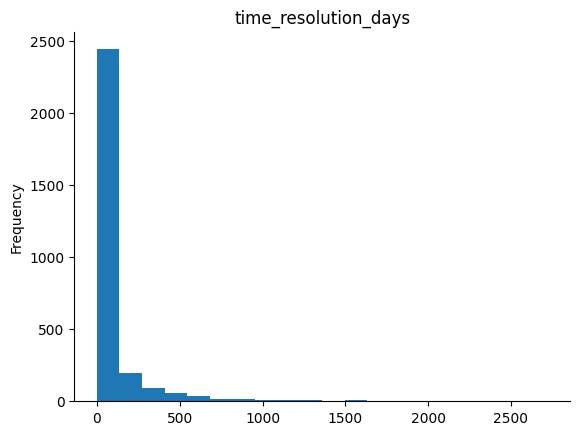

In [6]:
# @title time_resolution_days
from matplotlib import pyplot as plt

df_issues2['time_resolution_days'].plot(kind='hist', bins=20, title='time_resolution_days')
plt.gca().spines[['top', 'right',]].set_visible(False)

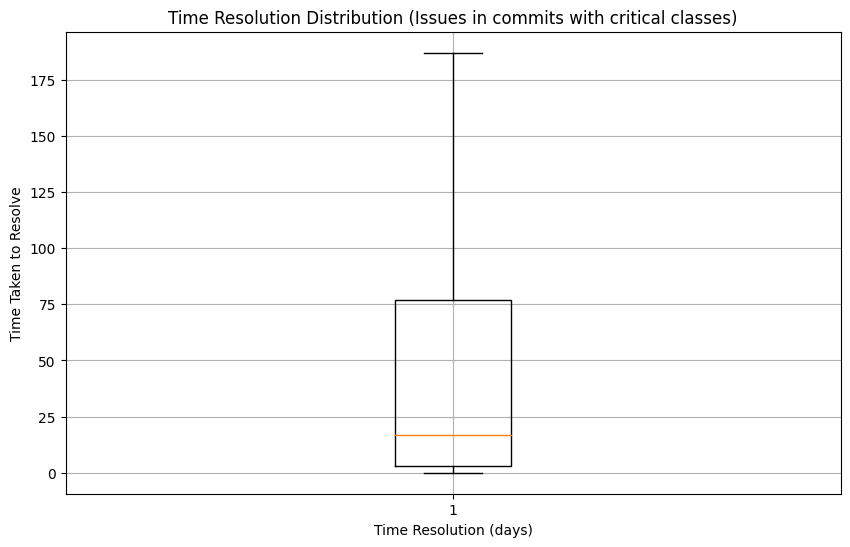

In [7]:
generate_boxsplot(coluna=df_issues2['time_resolution_days'],
                  my_title='Time Resolution Distribution (Issues in commits with critical classes)',
                  xlabel='Time Resolution (days)',
                  ylabel='Time Taken to Resolve',
                  outliers=False)

## Commits with critical files

In [9]:
url_file5 = "https://github.com/armandossrecife/my_evaluation/raw/main/cassandra/cassandra_commits_arquivos_criticos.xlsx"
df_cassandra_commits_arquivos_criticos = pd.read_excel(url_file5)
df_cassandra_commits_arquivos_criticos

,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,git-svn-id: https://svn.apache.org/repos/asf/i...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",2/3/2009,74502,344,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""Binary files /dev/null and b/lib/JSAP-..."
1,cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,Add build script and make sure it works\n\ngit...,['StorageService.java'],2/3/2009,156,4,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -0,0 +1,133 @@\n+<?xml version=\""1...."
2,5bea7e1772e9fd042b10abebb1e0c78579942b26,Removed references to JDK7 specific things.\n\...,['ColumnFamilyStore.java'],20/3/2009,82,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -20,7 +20,6 @@ package org.apache.c..."
3,f4f3ca50d84e165a909dca5608babb32df199f44,rename serializer2 -> serializerWithIndexers\n...,['ColumnFamilyStore.java'],27/3/2009,26,4,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -70,7 +70,7 @@ public final class C..."
4,39d3f833f9c4e154eb157336f5e7b2a1ce9a79a3,add SuperColumn support to forceFlush. split ...,['ColumnFamilyStore.java'],27/3/2009,89,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -395,11 +395,11 @@ public class Col..."
...,...,...,...,...,...,...,...,...
4517,6708499e4c930f7733894e6076b925fb151d9251,Remove metrics-reporter-config dependency\n\np...,['CassandraDaemon.java'],12/9/2023,105,10,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -43,7 +43,6 @@\n <..."
4518,20d80118ac02d853d501e3f5c24a63a12d4010f5,Add the ability to disable bulk loading of SST...,['Config.java'],19/9/2023,289,11,"[\n {\n ""Config.java"": ""@@ -860,6 +8...","[\n ""@@ -1,4 +1,5 @@\n 5.1\n+ * Add the abi..."
4519,d16e8d3653dce8ed767a040c06dbaabc47a9b474,Do not create sstable files before registering...,['CompactionManager.java'],25/9/2023,724,18,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 5.0-alpha2\n+ * Do n..."
4520,b9586501a6b6cdfe465302448018785652c9b966,Internode legacy SSL storage port certificate ...,['MessagingService.java'],25/9/2023,237,13,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Internode..."


## Commits with issues with architectural impact

In [10]:
url_file4 = "https://github.com/armandossrecife/my_evaluation/raw/main/cassandra/cassandra_commits_issues_yes_ai_satd.xlsx"
df_cassandra_commits_issues_yes_ai_satd = pd.read_excel(url_file4)
df_cassandra_commits_issues_yes_ai_satd

,commit,msg,lines,files,keywords,comments
0,9db8da81b7f269e5a8a7f896b751d482847d7082,"Add range query support, which requires using ...",1456,19,"['interface', 'interface', 'TODO', 'TODO']",[' * Do not mix with calls to the iterator...
1,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,use normal Table for system metadata\npatch by...,304,8,['update'],[' * This method is used to update the Sys...
2,064a59cdb00361c6b92ce098922b87357cae7736,cleanup CFS.onstart\npatch by jbellis; reviewe...,41,2,['files'],[' // scan for data files corresponding...
3,7bfe8df549c5bd2761801e3616f7c08db1fc5fbd,"Revert ""remove sstableLock. re-order a few op...",182,4,"['files', 'files', 'rename', 'TODO']",[' * This is called after bootstrap to add...
4,bee816c68a81b0812959c5f58e393e0b167a287f,"Replace sstableLock with SSTableTracker, which...",433,10,"['unnecessary', 'files', 'constructor', 'get r...","[' * and if a call is unnecessary, it will..."
5,6f00a24296179b0abc9673c94f76d1e551ebdeab,respect memtable thresholds when replaying com...,64,5,"['header', 'TODO']",[' // the log heade...
6,0da82f321c6c662cbd72f0d9895a916cf0aa71a4,implement keyspace round-robin scheduler. pat...,632,11,"['constructor', 'files', 'implementation', 'te...",[' * Implementors of IRequestScheduler must pr...
7,e9f265cee6c4e805d9c40f325977318fdc1922eb,add JVM shutdownhook to sync commitlog\npatch ...,203,7,['fix'],[' * fix potential overflow in nodetool cfstat...
8,70688be04093e9076aef261a4722bb17d489596f,centralize MessageDigest creation and use thre...,182,9,"['refact', 'refactor']",[' * refactor MessageDigest creation code. (CA...
9,4069d8af44241b84cfdfa60dc362868ef5241ecf,make sure truncate clears out the commitlog\np...,115,5,"['clean', 'clean', 'clean']",[' // for a given column family the mem...


In [11]:
# Apply extract_cassandra_id function to 'my_text' column and add a new column
df_cassandra_commits_issues_yes_ai_satd['issue_id'] = df_cassandra_commits_issues_yes_ai_satd['msg'].apply(extract_cassandra_id)

In [12]:
df_cassandra_commits_issues_yes_ai_satd

,commit,msg,lines,files,keywords,comments,issue_id
0,9db8da81b7f269e5a8a7f896b751d482847d7082,"Add range query support, which requires using ...",1456,19,"['interface', 'interface', 'TODO', 'TODO']",[' * Do not mix with calls to the iterator...,CASSANDRA-71
1,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,use normal Table for system metadata\npatch by...,304,8,['update'],[' * This method is used to update the Sys...,CASSANDRA-235
2,064a59cdb00361c6b92ce098922b87357cae7736,cleanup CFS.onstart\npatch by jbellis; reviewe...,41,2,['files'],[' // scan for data files corresponding...,CASSANDRA-235
3,7bfe8df549c5bd2761801e3616f7c08db1fc5fbd,"Revert ""remove sstableLock. re-order a few op...",182,4,"['files', 'files', 'rename', 'TODO']",[' * This is called after bootstrap to add...,CASSANDRA-414
4,bee816c68a81b0812959c5f58e393e0b167a287f,"Replace sstableLock with SSTableTracker, which...",433,10,"['unnecessary', 'files', 'constructor', 'get r...","[' * and if a call is unnecessary, it will...",CASSANDRA-414
5,6f00a24296179b0abc9673c94f76d1e551ebdeab,respect memtable thresholds when replaying com...,64,5,"['header', 'TODO']",[' // the log heade...,CASSANDRA-609
6,0da82f321c6c662cbd72f0d9895a916cf0aa71a4,implement keyspace round-robin scheduler. pat...,632,11,"['constructor', 'files', 'implementation', 'te...",[' * Implementors of IRequestScheduler must pr...,CASSANDRA-1035
7,e9f265cee6c4e805d9c40f325977318fdc1922eb,add JVM shutdownhook to sync commitlog\npatch ...,203,7,['fix'],[' * fix potential overflow in nodetool cfstat...,CASSANDRA-1919
8,70688be04093e9076aef261a4722bb17d489596f,centralize MessageDigest creation and use thre...,182,9,"['refact', 'refactor']",[' * refactor MessageDigest creation code. (CA...,CASSANDRA-2107
9,4069d8af44241b84cfdfa60dc362868ef5241ecf,make sure truncate clears out the commitlog\np...,115,5,"['clean', 'clean', 'clean']",[' // for a given column family the mem...,CASSANDRA-2950


In [13]:
df_teste = df_cassandra_commits_arquivos_criticos[df_cassandra_commits_arquivos_criticos['hahs'].isin(df_cassandra_commits_issues_yes_ai_satd.commit.to_list())]
df_teste

,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files
79,9db8da81b7f269e5a8a7f896b751d482847d7082,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ..."
147,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ..."
149,064a59cdb00361c6b92ce098922b87357cae7736,cleanup CFS.onstart\npatch by jbellis; reviewe...,['ColumnFamilyStore.java'],24/6/2009,41,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -147,7 +147,7 @@ public final class..."
258,7bfe8df549c5bd2761801e3616f7c08db1fc5fbd,"Revert ""remove sstableLock. re-order a few op...",['ColumnFamilyStore.java'],7/9/2009,182,4,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -175,7 +175,7 @@ public class Binar..."
265,bee816c68a81b0812959c5f58e393e0b167a287f,"Replace sstableLock with SSTableTracker, which...","['ColumnFamilyStore.java', 'SSTableReader.java']",10/9/2009,433,10,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -77,10 +77,7 @@ public final class ..."
420,6f00a24296179b0abc9673c94f76d1e551ebdeab,respect memtable thresholds when replaying com...,['ColumnFamilyStore.java'],9/12/2009,64,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -18,6 +18,7 @@\n * avoid GCing tom..."
748,0da82f321c6c662cbd72f0d9895a916cf0aa71a4,implement keyspace round-robin scheduler. pat...,"['Config.java', 'DatabaseDescriptor.java']",9/7/2010,632,11,"[\n {\n ""Config.java"": ""@@ -72,6 +72...","[\n ""@@ -18,6 +18,8 @@ Features\n - Str..."
1108,e9f265cee6c4e805d9c40f325977318fdc1922eb,add JVM shutdownhook to sync commitlog\npatch ...,['StorageService.java'],26/1/2011,203,7,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,6 +1,7 @@\n 0.7.2-dev\n- * fix p..."
1157,70688be04093e9076aef261a4722bb17d489596f,centralize MessageDigest creation and use thre...,['MessagingService.java'],18/2/2011,182,9,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -22,6 +22,7 @@\n \n \n 0.7.1\n+ * r..."
1446,4069d8af44241b84cfdfa60dc362868ef5241ecf,make sure truncate clears out the commitlog\np...,['ColumnFamilyStore.java'],11/8/2011,115,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,6 +1,8 @@\n 0.8.5\n * fix NPE w..."


In [14]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 79 to 4520
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   hahs                 53 non-null     object
 1   msg                  53 non-null     object
 2   m_files              53 non-null     object
 3   date                 53 non-null     object
 4   lines                53 non-null     int64 
 5   files                53 non-null     int64 
 6   diff_files           53 non-null     object
 7   diff_modified_files  53 non-null     object
dtypes: int64(2), object(6)
memory usage: 5.8+ KB


In [15]:
df_teste['issue_id'] = df_teste['msg'].apply(extract_cassandra_id)
df_teste

<ipython-input-15-7b3659acbd5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['issue_id'] = df_teste['msg'].apply(extract_cassandra_id)


,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files,issue_id
79,9db8da81b7f269e5a8a7f896b751d482847d7082,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ...",CASSANDRA-71
147,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ...",CASSANDRA-235
149,064a59cdb00361c6b92ce098922b87357cae7736,cleanup CFS.onstart\npatch by jbellis; reviewe...,['ColumnFamilyStore.java'],24/6/2009,41,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -147,7 +147,7 @@ public final class...",CASSANDRA-235
258,7bfe8df549c5bd2761801e3616f7c08db1fc5fbd,"Revert ""remove sstableLock. re-order a few op...",['ColumnFamilyStore.java'],7/9/2009,182,4,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -175,7 +175,7 @@ public class Binar...",CASSANDRA-414
265,bee816c68a81b0812959c5f58e393e0b167a287f,"Replace sstableLock with SSTableTracker, which...","['ColumnFamilyStore.java', 'SSTableReader.java']",10/9/2009,433,10,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -77,10 +77,7 @@ public final class ...",CASSANDRA-414
420,6f00a24296179b0abc9673c94f76d1e551ebdeab,respect memtable thresholds when replaying com...,['ColumnFamilyStore.java'],9/12/2009,64,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -18,6 +18,7 @@\n * avoid GCing tom...",CASSANDRA-609
748,0da82f321c6c662cbd72f0d9895a916cf0aa71a4,implement keyspace round-robin scheduler. pat...,"['Config.java', 'DatabaseDescriptor.java']",9/7/2010,632,11,"[\n {\n ""Config.java"": ""@@ -72,6 +72...","[\n ""@@ -18,6 +18,8 @@ Features\n - Str...",CASSANDRA-1035
1108,e9f265cee6c4e805d9c40f325977318fdc1922eb,add JVM shutdownhook to sync commitlog\npatch ...,['StorageService.java'],26/1/2011,203,7,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,6 +1,7 @@\n 0.7.2-dev\n- * fix p...",CASSANDRA-1919
1157,70688be04093e9076aef261a4722bb17d489596f,centralize MessageDigest creation and use thre...,['MessagingService.java'],18/2/2011,182,9,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -22,6 +22,7 @@\n \n \n 0.7.1\n+ * r...",CASSANDRA-2107
1446,4069d8af44241b84cfdfa60dc362868ef5241ecf,make sure truncate clears out the commitlog\np...,['ColumnFamilyStore.java'],11/8/2011,115,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,6 +1,8 @@\n 0.8.5\n * fix NPE w...",CASSANDRA-2950


In [16]:
df_commits_classes_critical_issues_ai = df_teste.copy()
df_commits_classes_critical_issues_ai

,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files,issue_id
79,9db8da81b7f269e5a8a7f896b751d482847d7082,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ...",CASSANDRA-71
147,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ...",CASSANDRA-235
149,064a59cdb00361c6b92ce098922b87357cae7736,cleanup CFS.onstart\npatch by jbellis; reviewe...,['ColumnFamilyStore.java'],24/6/2009,41,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -147,7 +147,7 @@ public final class...",CASSANDRA-235
258,7bfe8df549c5bd2761801e3616f7c08db1fc5fbd,"Revert ""remove sstableLock. re-order a few op...",['ColumnFamilyStore.java'],7/9/2009,182,4,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -175,7 +175,7 @@ public class Binar...",CASSANDRA-414
265,bee816c68a81b0812959c5f58e393e0b167a287f,"Replace sstableLock with SSTableTracker, which...","['ColumnFamilyStore.java', 'SSTableReader.java']",10/9/2009,433,10,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -77,10 +77,7 @@ public final class ...",CASSANDRA-414
420,6f00a24296179b0abc9673c94f76d1e551ebdeab,respect memtable thresholds when replaying com...,['ColumnFamilyStore.java'],9/12/2009,64,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -18,6 +18,7 @@\n * avoid GCing tom...",CASSANDRA-609
748,0da82f321c6c662cbd72f0d9895a916cf0aa71a4,implement keyspace round-robin scheduler. pat...,"['Config.java', 'DatabaseDescriptor.java']",9/7/2010,632,11,"[\n {\n ""Config.java"": ""@@ -72,6 +72...","[\n ""@@ -18,6 +18,8 @@ Features\n - Str...",CASSANDRA-1035
1108,e9f265cee6c4e805d9c40f325977318fdc1922eb,add JVM shutdownhook to sync commitlog\npatch ...,['StorageService.java'],26/1/2011,203,7,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,6 +1,7 @@\n 0.7.2-dev\n- * fix p...",CASSANDRA-1919
1157,70688be04093e9076aef261a4722bb17d489596f,centralize MessageDigest creation and use thre...,['MessagingService.java'],18/2/2011,182,9,"[\n {\n ""MessagingService.java"": ""@@...","[\n ""@@ -22,6 +22,7 @@\n \n \n 0.7.1\n+ * r...",CASSANDRA-2107
1446,4069d8af44241b84cfdfa60dc362868ef5241ecf,make sure truncate clears out the commitlog\np...,['ColumnFamilyStore.java'],11/8/2011,115,5,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,6 +1,8 @@\n 0.8.5\n * fix NPE w...",CASSANDRA-2950


In [17]:
df_commits_classes_critical_issues_ai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 79 to 4520
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   hahs                 53 non-null     object
 1   msg                  53 non-null     object
 2   m_files              53 non-null     object
 3   date                 53 non-null     object
 4   lines                53 non-null     int64 
 5   files                53 non-null     int64 
 6   diff_files           53 non-null     object
 7   diff_modified_files  53 non-null     object
 8   issue_id             53 non-null     object
dtypes: int64(2), object(7)
memory usage: 6.2+ KB


In [23]:
colunas_uteis = ['m_files', 'files', 'issue_id']


In [24]:
df_analise1 = df_commits_classes_critical_issues_ai[colunas_uteis]
df_analise1

,m_files,files,issue_id
79,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",19,CASSANDRA-71
147,"['DatabaseDescriptor.java', 'StorageService.ja...",8,CASSANDRA-235
149,['ColumnFamilyStore.java'],2,CASSANDRA-235
258,['ColumnFamilyStore.java'],4,CASSANDRA-414
265,"['ColumnFamilyStore.java', 'SSTableReader.java']",10,CASSANDRA-414
420,['ColumnFamilyStore.java'],5,CASSANDRA-609
748,"['Config.java', 'DatabaseDescriptor.java']",11,CASSANDRA-1035
1108,['StorageService.java'],7,CASSANDRA-1919
1157,['MessagingService.java'],9,CASSANDRA-2107
1446,['ColumnFamilyStore.java'],5,CASSANDRA-2950


In [25]:
for each in df_analise1.m_files:
  print(each)

['DatabaseDescriptor.java', 'ColumnFamilyStore.java', 'StorageService.java']
['DatabaseDescriptor.java', 'StorageService.java']
['ColumnFamilyStore.java']
['ColumnFamilyStore.java']
['ColumnFamilyStore.java', 'SSTableReader.java']
['ColumnFamilyStore.java']
['Config.java', 'DatabaseDescriptor.java']
['StorageService.java']
['MessagingService.java']
['ColumnFamilyStore.java']
['ColumnFamilyStore.java']
['ColumnFamilyStore.java', 'CompactionManager.java', 'SSTableReader.java']
['ColumnFamilyStore.java']
['ColumnFamilyStore.java', 'StorageProxy.java']
['StorageService.java', 'NodeProbe.java']
['ColumnFamilyStore.java', 'CompactionManager.java']
['MessagingService.java']
['StorageService.java', 'NodeProbe.java']
['MessagingService.java']
['CompactionManager.java', 'MessagingService.java', 'StorageService.java']
['SSTableReader.java']
['SSTableReader.java']
['SelectStatement.java', 'ColumnFamilyStore.java']
['ColumnFamilyStore.java']
['Config.java', 'DatabaseDescriptor.java', 'ColumnFamilyS